# The Spark Foundation #GRIPMAY2021


# Task 1 - Prection using supervised ML


# By:- Adil Iqbal 

In [14]:
#importing necessary modules
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


In [15]:
# Reading the data
url='https://raw.githubusercontent.com/AdiPersonalWorks/Random/master/student_scores%20-%20student_scores.csv'
df=pd.read_csv(url)

In [16]:
df.head()

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30


In [17]:
#checking for null values and data types 
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Hours   25 non-null     float64
 1   Scores  25 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 528.0 bytes


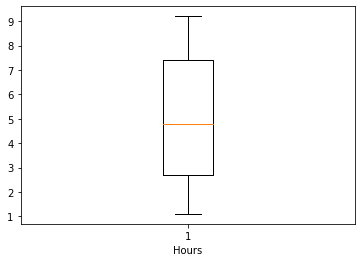

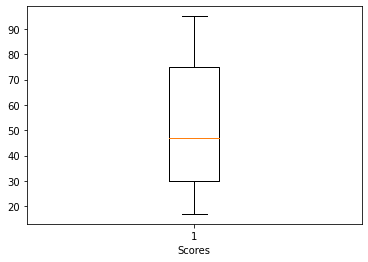

In [18]:
#checking for outliers in data
for i in df.columns:
    plt.boxplot(df[i])
    plt.xlabel(i)
    plt.show()
    

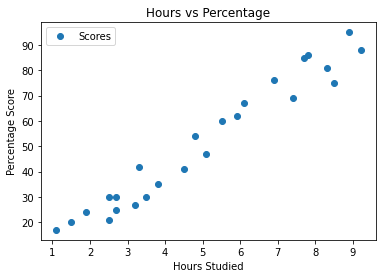

In [19]:
# Plotting the distribution of scores
df.plot(x='Hours', y='Scores', style='o')  
plt.title('Hours vs Percentage')  
plt.xlabel('Hours Studied')  
plt.ylabel('Percentage Score')  
plt.show()

In [20]:
#checking how is our data corellated
df.corr()

,Hours,Scores
Hours,1.000000,0.976191
Scores,0.976191,1.000000


In [21]:
#assigining the target and feature variable
X = df['Hours'].values.reshape(-1,1)
y = df['Scores'].values.reshape(-1,1)

In [22]:
#importing libraries to make our model and metrics to check the accuracy of the data
from sklearn.linear_model import LinearRegression
from sklearn import metrics
from sklearn.model_selection import train_test_split 

In [23]:
#splitting the data into train and test data sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.6, random_state=0)

In [24]:
#creating and training the model
regressor = LinearRegression()  #creating the instance of our regressor
regressor.fit(X_train,y_train) #training the algorithm

LinearRegression()

In [25]:
#To retrieve the intercept:
print(regressor.intercept_)

#For retrieving the slope:
print(regressor.coef_)

[-1.29276527]
[[10.28023446]]


In [26]:
# getting the predictions of our test data sets
y_pred = regressor.predict(X_test)

In [27]:
# creating another data frame with predicted and actual values
df2= pd.DataFrame({'Actual': y_test.flatten(), 'Predicted': y_pred.flatten()})
df2

,Actual,Predicted
0,20,14.127586
1,27,31.603985
2,69,74.780970
3,30,24.407821
4,62,59.360618
5,35,37.772126
6,24,18.239680
7,86,78.893064
8,76,69.640853
9,17,10.015493


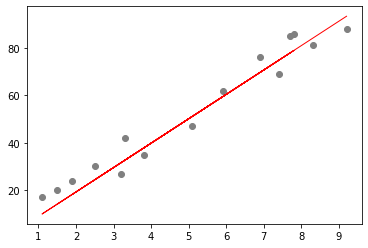

In [28]:
#plotting our best fit line to our Y_test data
plt.scatter(X_test, y_test,  color='gray')
plt.plot(X_test, y_pred, color='red', linewidth=1)
plt.show()

In [29]:
#checking for the different types of error
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))  
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

Mean Absolute Error: 5.495328044848561
Mean Squared Error: 33.38996487330501
Root Mean Squared Error: 5.778405045798106


In [30]:
#checking our score for the model on unseen data set
regressor.score(X_test,y_test)

0.9493968767075276

In [31]:
# checking score for the trained data sets
regressor.score(X_train,y_train)

0.9446259575411167

In [32]:
regressor.predict([[9.25]])

array([[93.79940349]])

# no. of hours is 9.25 and predicted score is 93.79940349